In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os 
import librosa
import librosa.display
import time
print("SIDD")


SIDD


In [2]:
def feature_extraction(file_name):
    audio_data,sample_rate = librosa.load(file_name,res_type="kaiser_fast")
    mfcc_features = librosa.feature.mfcc(y=audio_data,sr=sample_rate,n_mfcc=60)
    mfcc_scaled_features = np.mean(mfcc_features.T,axis=0)
    
    return mfcc_scaled_features

In [5]:
print(os.getcwd()+'/models/music.h5')

/home/siddhu/Desktop/IBM INSTRUMENT DETECTION/models/music.h5


In [17]:
model = keras.models.load_model(os.getcwd()+'/models/music.h5')

BASE_DIR="/home/siddhu/Downloads/IBM DATASET"
filename=BASE_DIR+"/IRMAS dataset-20210515T054853Z-002/IRMAS dataset/IRMAS-TrainingData/gel/028__[gel][dru][pop_roc]0930__3.wav"
prediction_feature=feature_extraction(filename)
prediction_feature=prediction_feature.reshape(1,-1)
# model.predict_classes(prediction_feature)
np.argmax(model.predict(prediction_feature), axis=-1)


array([4])

In [197]:
BASE_DIR="/home/siddhu/Downloads/IBM DATASET"

In [198]:
os.chdir(BASE_DIR)
MAIN_FOLDER=(os.listdir(os.getcwd()))

In [199]:
for i in MAIN_FOLDER:
    SUB_FOLDER=os.path.join(os.getcwd(),i+"/IRMAS dataset/IRMAS-TrainingData")
    print(os.listdir(SUB_FOLDER))

['voi', 'pia', 'cla', 'gel', 'gac', 'org', 'sax', 'cel', 'vio', 'flu', 'tru']
['voi', 'pia', 'cla', 'gel', 'gac', 'org', 'sax', 'cel', 'vio', 'flu', 'tru']
['voi', 'pia', 'cla', 'gel', 'gac', 'org', 'sax', 'cel', 'vio', 'flu', 'tru']
['pia', 'cla', 'gel', 'gac', 'sax', 'cel', 'vio', 'flu', 'tru']
['voi', 'pia', 'cla', 'gel', 'gac', 'org', 'sax', 'cel', 'vio', 'flu', 'tru']
['voi', 'pia', 'cla', 'gel', 'gac', 'org', 'sax', 'cel', 'vio', 'flu', 'tru']


In [200]:
audio_file_path=BASE_DIR+"/IRMAS dataset-20210515T054853Z-001/IRMAS dataset/IRMAS-TrainingData/cel/012__[cel][nod][cla]0043__1.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [201]:
print(librosa_audio_data)

[ 0.00013466 -0.0038507  -0.010127   ...  0.00117442  0.0085911
  0.        ]


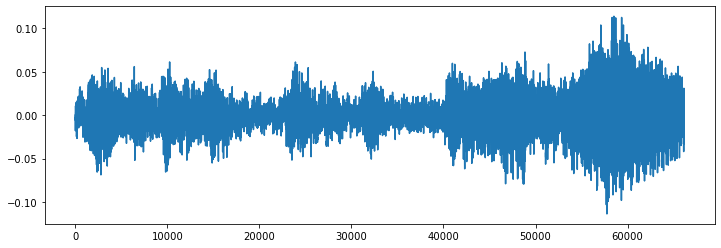

In [202]:
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [203]:
mfcc=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)
print(mfcc.shape)

(40, 130)


In [204]:
mfcc

array([[-357.62897  , -348.01428  , -313.92914  , ..., -313.80374  ,
        -309.4827   , -298.71747  ],
       [ 142.51242  ,  127.13782  ,  112.66728  , ...,  124.23071  ,
         129.24225  ,  131.34424  ],
       [ -10.308102 ,  -10.449833 ,  -19.639755 , ...,  -14.168493 ,
         -15.471186 ,  -12.838678 ],
       ...,
       [   9.406958 ,   10.214735 ,    7.9070444, ...,   -0.378968 ,
          -3.1280732,   -3.5267274],
       [  -8.709026 ,   -6.3272905,   -9.904915 , ...,  -19.686235 ,
         -15.780066 ,   -9.537672 ],
       [ -10.415348 ,  -14.213655 ,  -18.584616 , ...,   13.066643 ,
          11.45553  ,   11.806913 ]], dtype=float32)

In [205]:
mfcc_scaled = np.mean(mfcc.T,axis=0)
print(mfcc_scaled)

[-311.14752     126.71019     -20.981855     32.269165      5.8106003
    4.8382063    -9.349273      0.72835606   -5.867596     -1.794443
   -6.503386      1.5271035     2.2606897     3.4743278    -4.7768292
    4.1370325    -4.124373     -3.0805943    -3.1281273     5.7419662
    5.1310296     5.665455      0.4158539     3.1433775    -2.1885328
    4.2706375    -0.70019       8.91028       0.9426272     1.1885297
   -5.1646123    -0.9908376    -4.6404214    -2.4134715    -2.2875803
    3.1770523     3.442656      2.652967     -8.728375      1.4598871 ]


In [206]:
mfcc_scaled.shape

(40,)

In [207]:
def feature_extraction(file_name):
    audio_data,sample_rate = librosa.load(file_name,res_type="kaiser_fast")
    mfcc_features = librosa.feature.mfcc(y=audio_data,sr=sample_rate,n_mfcc=60)
    mfcc_scaled_features = np.mean(mfcc_features.T,axis=0)
    
    return mfcc_scaled_features

In [208]:
from tqdm import tqdm

In [209]:
extracted_features=[]
for i in MAIN_FOLDER:
    SUB_FOLDER=os.path.join(os.getcwd(),i+"/IRMAS dataset/IRMAS-TrainingData")
    for j in os.listdir(SUB_FOLDER):
        files=os.path.join(SUB_FOLDER,j)
        for k in os.listdir(files):
            file_name=SUB_FOLDER+"/"+j+"/"+k
            final_class_labels=j
            data=feature_extraction(file_name)
            extracted_features.append([data,final_class_labels])

In [210]:

import pandas as pd
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()



,feature,class
0,"[-183.60242, 110.43008, 0.19486049, 54.63219, ...",voi
1,"[-293.77524, 108.37077, 10.285248, 33.30386, 1...",voi
2,"[-149.23776, 136.17473, -12.557561, 34.44779, ...",voi
3,"[-98.12126, 116.654655, -13.4617405, 27.144598...",voi
4,"[-67.683525, 111.57057, -34.707047, 49.985916,...",voi


In [211]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [212]:
X.shape

(6705, 60)

In [213]:
y.shape

(6705,)

In [214]:
### Label Encoding
y=np.array(pd.get_dummies(y))

In [215]:
y

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [216]:
y.shape

(6705, 11)

In [217]:
# ### Label Encoder MKC Iski
# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# y = to_categorical(labelencoder.fit_transform(y))

In [218]:
# y

In [219]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [220]:
X_train

array([[-8.3211823e+01,  1.3214873e+02, -4.7531414e+01, ...,
        -4.9055319e+00,  1.8225089e+00,  1.1289558e+00],
       [-1.5104430e+02,  1.3711406e+02, -2.2155001e+01, ...,
        -5.2627125e+00,  2.8859866e+00,  1.0241450e+00],
       [-3.5173508e+02,  1.4156367e+02, -2.2616741e+01, ...,
        -1.7545207e+00, -1.0000551e+00, -1.4822302e+00],
       ...,
       [-4.6387079e+02,  1.7931042e+02, -1.9343996e+01, ...,
         2.3249323e+00,  2.2071226e+00,  1.7328696e+00],
       [-5.8837711e+01,  1.1539143e+02, -1.2950603e+01, ...,
        -2.5028965e+00,  8.4539843e-01, -2.4463778e+00],
       [-4.2965674e+02,  1.9050870e+02, -1.8067073e+00, ...,
         4.6327615e+00, -9.8989928e-01, -1.8170635e-01]], dtype=float32)

In [221]:
y

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [222]:
X_train.shape

(5364, 60)

In [258]:
X_train=X_train[...,np.newaxis]


In [260]:
print(X_train.shape)

(5364, 60, 1)


In [261]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [262]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [263]:
### No of classes
num_labels=y.shape[1]

In [264]:
from tensorflow.keras.layers import BatchNormalization,Conv2D, BatchNormalization, Activation, MaxPool2D, Flatten

model=Sequential()

# model.add(Dense(400,input_shape=(60,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

# model.add(Dense(200))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())


# model.add(Dense(100))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

# model.add(Dense(50))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

# model.add(Dense(num_labels))
# model.add(Activation('softmax'))

model.add(Conv2D(32, kernel_size=(2,2),padding="same", input_shape=(5364, 60,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, kernel_size=(4,10),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(32*3, kernel_size=(4,10),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(32*3, kernel_size=(4,10),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [265]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 5364, 60, 32)      160       
_________________________________________________________________
batch_normalization_10 (Batc (None, 5364, 60, 32)      128       
_________________________________________________________________
activation_55 (Activation)   (None, 5364, 60, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2682, 30, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2682, 30, 64)      81984     
_________________________________________________________________
batch_normalization_11 (Batc (None, 2682, 30, 64)      256       
_________________________________________________________________
activation_56 (Activation)   (None, 2682, 30, 64)    

In [266]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [268]:
y_train.shape

(5364, 11)

In [267]:
# Trianing model ;)
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


ValueError: in user code:

    /home/siddhu/anaconda3/envs/IBM/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/siddhu/anaconda3/envs/IBM/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/siddhu/anaconda3/envs/IBM/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/siddhu/anaconda3/envs/IBM/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/siddhu/anaconda3/envs/IBM/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/siddhu/anaconda3/envs/IBM/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/siddhu/anaconda3/envs/IBM/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/siddhu/anaconda3/envs/IBM/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/siddhu/anaconda3/envs/IBM/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_21 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 60, 1)


In [244]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.6122297048568726


In [233]:
filename=BASE_DIR+"/IRMAS dataset-20210515T054853Z-001/IRMAS dataset/IRMAS-TrainingData/cel/012__[cel][nod][cla]0043__1.wav"
prediction_feature=feature_extraction(filename)
prediction_feature=prediction_feature.reshape(1,-1)
# model.predict_classes(prediction_feature)
np.argmax(model.predict(prediction_feature), axis=-1)

array([0])